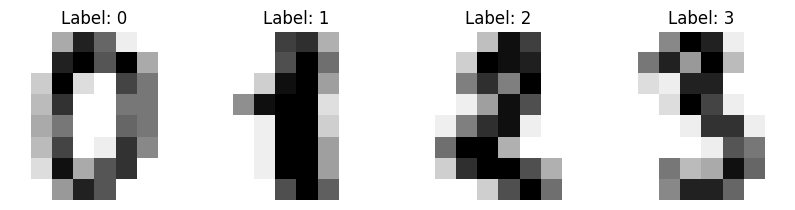

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

# Plot first 4 digit images with their labels
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

*dataset is a classic for benchmarking classification models. It contains 8×8 grayscale images (64 features), each representing a digit (0–9).*

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
import pandas as pd
df = pd.DataFrame(digits.data)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>,
        <Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>],
       [<Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
        <Axes: title={'center': '26'}>, <Axes: title={'center': '27'}>,

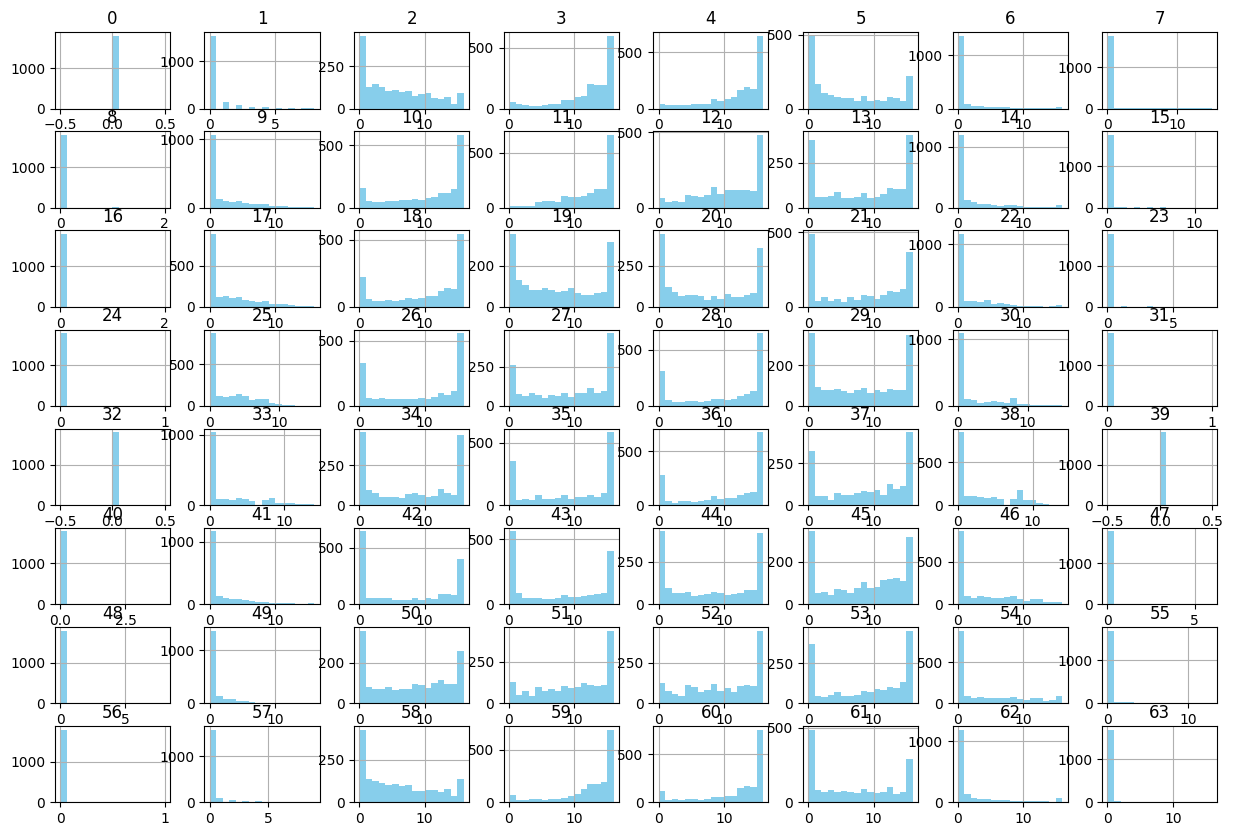

In [5]:
df.hist(bins=16, figsize=(15, 10), color='skyblue')

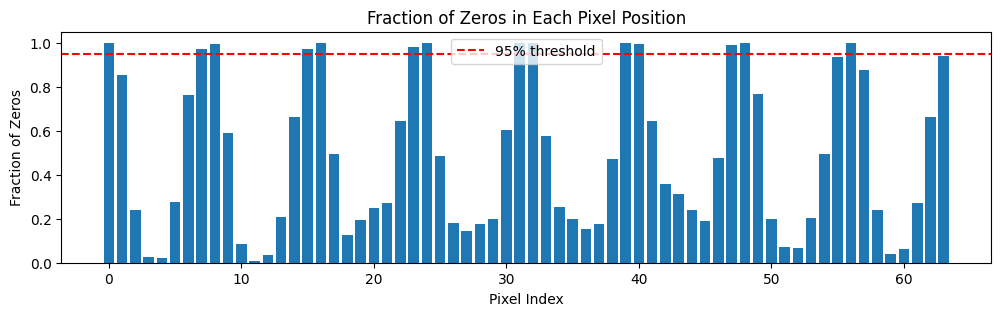

In [6]:
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data  

zero_fraction = (X == 0).sum(axis=0) / X.shape[0]

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.bar(range(64), zero_fraction)
plt.title("Fraction of Zeros in Each Pixel Position")
plt.xlabel("Pixel Index")
plt.ylabel("Fraction of Zeros")
plt.axhline(0.95, color='red', linestyle='--', label="95% threshold")
plt.legend()
plt.show()


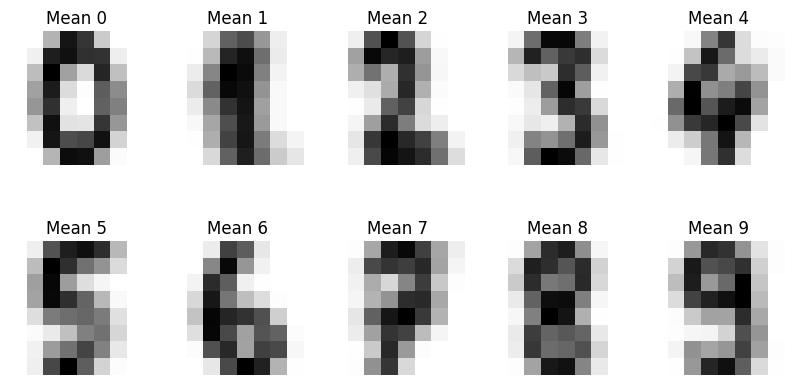

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    mean_img = np.mean(digits.images[digits.target == i], axis=0)
    ax = axes[i // 5, i % 5]
    ax.imshow(mean_img, cmap='gray_r')
    ax.set_title(f"Mean {i}")
    ax.axis('off')


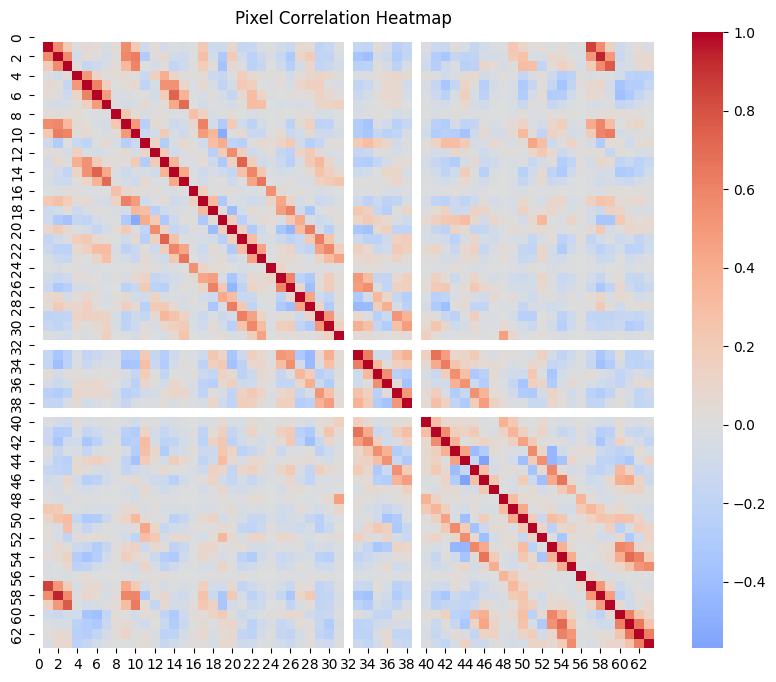

In [8]:
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Pixel Correlation Heatmap")
plt.show()


In [9]:
X_log = np.log1p(df)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, digits.target, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

with out tranform == 95 - 96

In [12]:
model.score(X_test,y_test)

0.9722222222222222

In [13]:
model.predict(digits.data[0:10])

array([0, 1, 2, 3, 1, 1, 6, 7, 8, 9])

In [14]:
y_pred=model.predict(X_test)

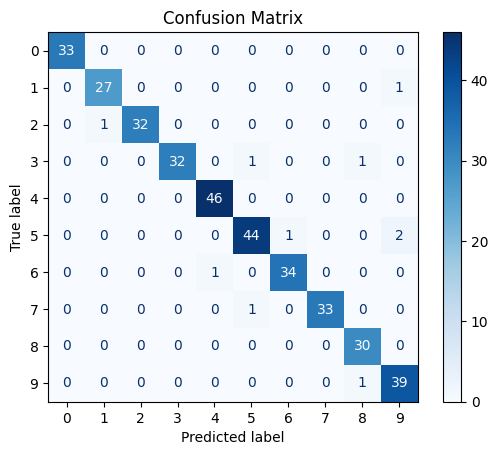

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()